In [13]:
import os


import numpy as np 
import matplotlib.pyplot as plt



from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

In [3]:
# Navigate four directories before the current directory
ROOT_DIR = os.path.dirname(os.path.dirname(os.path.dirname(os.path.abspath(os.getcwd()))))
IMAGES_DIR = os.path.join(ROOT_DIR, "images")
os.makedirs(IMAGES_DIR, exist_ok=True)

def image_path(fig_id):
    return os.path.join(IMAGES_DIR, fig_id)

In [4]:
iris = load_iris()

In [5]:
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [6]:
iris.feature_names, iris.target_names

(['sepal length (cm)',
  'sepal width (cm)',
  'petal length (cm)',
  'petal width (cm)'],
 array(['setosa', 'versicolor', 'virginica'], dtype='<U10'))

In [23]:
X = iris.data[:, 2:] # petal length and width
y = iris.target

In [24]:
tree_clf = DecisionTreeClassifier(max_depth=2)
tree_clf.fit(X, y)

DecisionTreeClassifier(max_depth=2)

In [25]:
from sklearn.tree import export_graphviz

export_graphviz(
    tree_clf,
    out_file=image_path('iris_tree.dot'),
    feature_names=iris.feature_names[2:],
    class_names=iris.target_names,
    rounded=True,
    filled=True
)

In [26]:
!dot -Tpng {IMAGES_DIR}/iris_tree.dot -o {IMAGES_DIR}/iris_tree.png

Scikit-Learn uses the CART algorithm, which produces only binary trees: nonleaf nodes always have two children (i.e., questions only have yes/no answers). However, other algorithms such as ID3 can produce Decision Trees with nodes that have more than two children.

In [27]:
from matplotlib.colors import ListedColormap


def plot_decision_boundary(clf, X, y, axes=[0, 7.5, 0, 3], iris=True, legend=False, plot_training=True):
    # Generate a grid of points within the specified axes range
    x1s = np.linspace(axes[0], axes[1], 100)
    x2s = np.linspace(axes[2], axes[3], 100)


    # Create a 2D grid of points
    x1, x2 = np.meshgrid(x1s, x2s)
    # Reshape the grid points into a 2D matrix
    X_new = np.c_[x1.ravel(), x2.ravel()]

    # Predict the class labels for the grid points
    y_pred = clf.predict(X_new).reshape(x1.shape)

    # Define custom color maps for the decision boundary and contour plots
    custom_cmap = ListedColormap(['#fafab0', '#9898ff', '#a0faa0'])

    # Plot the decision boundary
    plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=custom_cmap)

    if not iris:
        custom_cmap2 = ListedColormap(['#7d7d58', '#4c4c7f', '#507d50'])
        # Plot the contour lines for non-iris datasets
        plt.contour(x1, x2, y_pred, cmap=custom_cmap2, alpha=0.8)

    if plot_training:
        # Plot the training data points
        plt.plot(X[:, 0][y==0], X[:, 1][y==0], 'yo', label='Iris setosa')
        plt.plot(X[:, 0][y==1], X[:, 1][y==1], 'bs', label='Iris versicolor')
        plt.plot(X[:, 0][y==2], X[:, 1][y==2], 'g^', label='Iris virginica')
        plt.axis(axes)

    if iris:
        # Set the x and y axis labels for iris datasets
        plt.xlabel('Petal length', fontsize=14)
        plt.ylabel('Petal width', fontsize=14)
    else:
        # Set the x and y axis labels for non-iris datasets
        plt.xlabel(r'$x_1$', fontsize=18)
        plt.ylabel(r'$x_2$', fontsize=18, rotation=0)

    if legend:
        # Add legend if required
        plt.legend(loc='lower right', fontsize=14)

In [28]:
# get min and max values for each feature
x1_min, x1_max = X[:, 0].min(), X[:, 0].max()
x2_min, x2_max = X[:, 1].min(), X[:, 1].max()
x1_min, x1_max, x2_min, x2_max

(1.0, 6.9, 0.1, 2.5)

<function matplotlib.pyplot.show(close=None, block=None)>

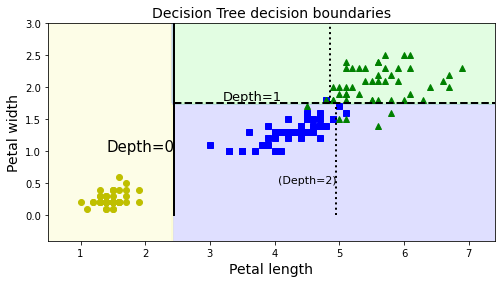

In [30]:
plt.figure(figsize=(8, 4))
plot_decision_boundary(tree_clf, X, y, axes=[x1_min - 0.5, x1_max + 0.5, x2_min - 0.5, x2_max + 0.5])
plt.plot([2.45, 2.45], [0, 3], 'k-', linewidth=2)
plt.plot([2.45, 7.5], [1.75, 1.75], 'k--', linewidth=2)
plt.plot([4.95, 4.95], [0, 1.75], 'k:', linewidth=2)
plt.plot([4.85, 4.85], [1.75, 3], 'k:', linewidth=2)
plt.text(1.40, 1.0, 'Depth=0', fontsize=15)
plt.text(3.2, 1.80, 'Depth=1', fontsize=13)
plt.text(4.05, 0.5, '(Depth=2)', fontsize=11)
plt.title('Decision Tree decision boundaries', fontsize=14)
plt.show